In [1]:
import math as m
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.rcParams['figure.figsize'] = 11.7,8.27

c:\Users\giaco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def get_scalar_run_tensorboard(tag, filepath):
    values, steps = [], []
    for e in tf.compat.v1.train.summary_iterator(str(filepath)):
        if len(e.summary.value)>0: #Skip first empty element
            if e.summary.value[0].tag==tag:
                value = float(e.summary.value[0].simple_value)
                step = e.step
                values.append(value)
                steps.append(step)
    return steps, values

def get_hparams(label: str) -> str:
    label = label.strip().split('/')[-2]
    hparams = label.split('_')
    # print(hparams)
    hparams = [y.split('=') for y in hparams]
    return { k: v for k, v in hparams }

def get_df(runs, tag):
    df = pd.DataFrame()

    for r in runs:
        label = r.as_posix()
        x, y = get_scalar_run_tensorboard(tag, r)
        df1 = pd.DataFrame(dict(label=label, x=x, y=y))
        df = pd.concat([df, df1])

    df.reset_index(drop=True, inplace=True)

    df['dreg'] = df['label'].map(lambda x: get_hparams(x)['dreg'])
    df['dmax'] = df['label'].map(lambda x: get_hparams(x)['dmax'])
    df['dmaxep'] = df['label'].map(lambda x: get_hparams(x)['dmaxep'])
    df['dmaxep'] = df['dmaxep'].map(lambda x: max(int(x), 100))

    df = df[df['dmax'].astype(float) < 0.6]
    return df


def fix_legend(legend):
    for t in legend.get_texts():
        make_it_title = True

        if t.get_text() == 'dreg':
            t.set_text(r"$\Delta_{reg}$")
        elif t.get_text() == 'dmax':
            t.set_text(r"$\Delta_{max}$")
        elif t.get_text() == 'dmaxep':
            t.set_text(r"$\Delta_{max-ep}$")
        else:
            make_it_title=False

        if make_it_title:
            t.set_position((-30, -3))
            t.set_fontweight("bold")
            t.set_fontsize('large')

In [3]:
log_folder = Path("./padova/src/logs2")
print("Folder OK:", log_folder.is_dir())

runs = list(log_folder.rglob('ternary/*/*/events.out*'))
print("\n".join([r.as_posix() for r in runs]))

Folder OK: True
padova/src/logs2/ternary/2024-05-29-16-15-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.3_dmax=0.3_dmaxep=0/events.out.tfevents.1716992100.pc-jack.9196.0
padova/src/logs2/ternary/2024-05-29-16-48-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.3_dmaxep=100/events.out.tfevents.1716994096.pc-jack.2128.0
padova/src/logs2/ternary/2024-05-29-17-21-26/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.3_dmaxep=100/events.out.tfevents.1716996086.pc-jack.2752.0
padova/src/logs2/ternary/2024-05-29-17-54-36/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.3_dmaxep=100/events.out.tfevents.1716998076.pc-jack.3544.0
padova/src/logs2/ternary/2024-05-29-18-29-24/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.5_dmax=0.5_dmaxep=0/events.out.tfevents.1717000164.pc-jack.12348.0
padova/src/logs2/ternary/2024-05-29-19-02-41/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.5_dmaxep=100/events.out.tfevents.1717002161.pc-jack.19692.0
padova/src/logs2/ter

,label,x,y,dreg,dmax,dmaxep
0,padova/src/logs2/ternary/2024-05-29-16-15-00/b...,0,62.642750,const,0.3,100
1,padova/src/logs2/ternary/2024-05-29-16-15-00/b...,10,75.655243,const,0.3,100
2,padova/src/logs2/ternary/2024-05-29-16-15-00/b...,20,79.232033,const,0.3,100
3,padova/src/logs2/ternary/2024-05-29-16-15-00/b...,30,83.126160,const,0.3,100
4,padova/src/logs2/ternary/2024-05-29-16-15-00/b...,40,82.811768,const,0.3,100
...,...,...,...,...,...,...
795,padova/src/logs2/ternary/2024-05-30-03-20-16/b...,450,91.836891,log,0.3,100
796,padova/src/logs2/ternary/2024-05-30-03-20-16/b...,460,92.605942,log,0.3,100
797,padova/src/logs2/ternary/2024-05-30-03-20-16/b...,470,91.858658,log,0.3,100
798,padova/src/logs2/ternary/2024-05-30-03-20-16/b...,480,91.799004,log,0.3,100


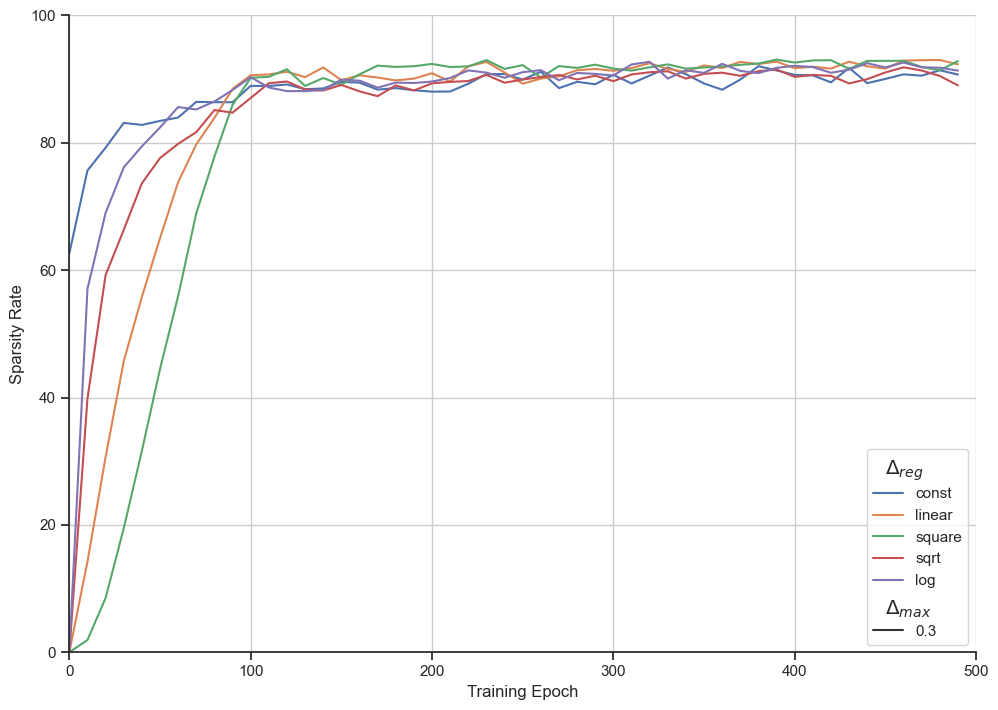

In [41]:
def filter_df(df):
    df = df[df["dmaxep"] == 100]
    return df[df["dmax"].map(lambda x: x in ['0.3'])]


df1 = get_df(runs, 'weights/zeros')
df1 = filter_df(df1)

plt.grid()
plt.ylabel("Sparsity Rate")
plt.xlabel("Training Epoch")
plt.ylim((0, 100))
plt.xlim((0, 500))
g = sns.lineplot(data=df1, x="x", y="y", hue="dreg", style="dmax", estimator=None)

legend = g.legend()
fix_legend(legend)
df1

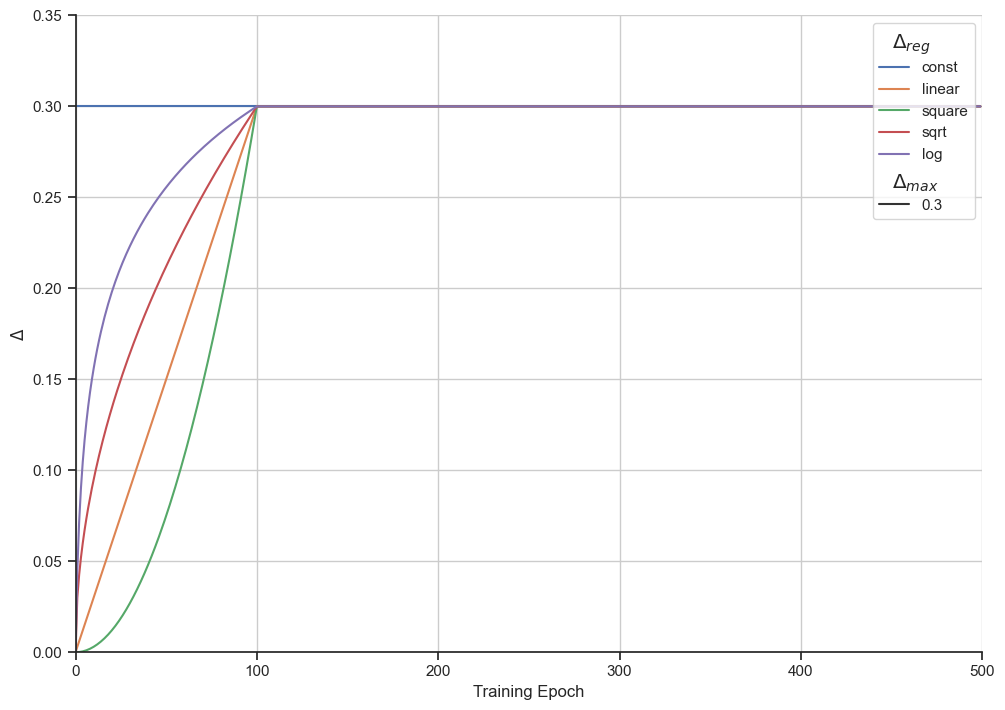

In [42]:
df2 = get_df(runs, 'DELTA')
df2 = filter_df(df2)

plt.grid()
plt.ylabel("$\Delta$")
plt.ylim((0, 0.35))
plt.xlabel("Training Epoch")
plt.xlim((0, 500))

sns.lineplot(data=df2, x="x", y="y", hue="dreg", style="dmax", estimator=None)

legend = plt.legend(loc='upper right')
fix_legend(legend)